# Linear Regression with Scikit Learn - Machine Learning with Python

## Import libs and data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv')

# Alternatively, you can load the dataset from a local file if you have it downloaded
# df = pd.read_csv('data/01-medical-charges.csv')

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Data Wrangling / EDA

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

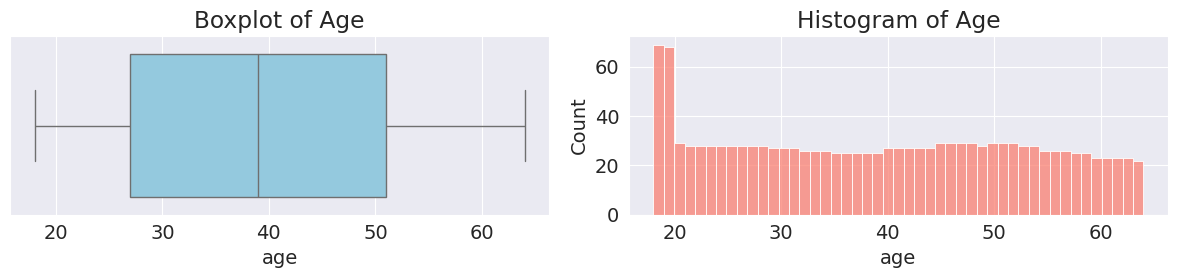

In [7]:
plt.figure(figsize=(12, 3))

# Subplot 1 – Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='age', color='skyblue')
plt.title('Boxplot of Age')

# Subplot 2 – Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='age', bins=47, color='salmon')
plt.title('Histogram of Age')

plt.tight_layout()
plt.show()

In [8]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

### BMI (Body Mass Index)

<img src='imgs/01-bmi.png' width=600>

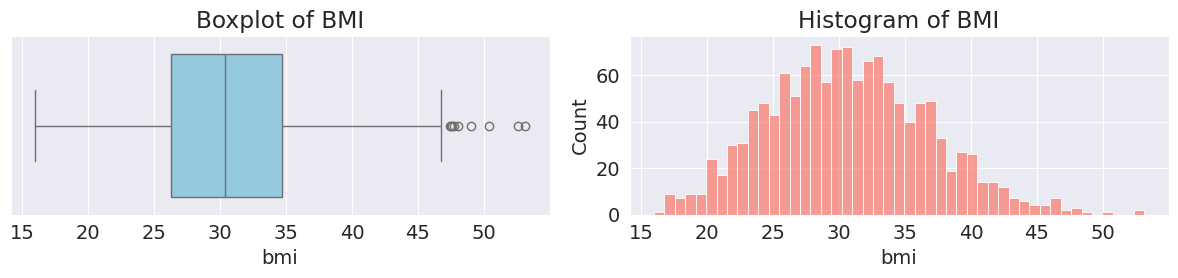

In [9]:
plt.figure(figsize=(12, 3))

# Subplot 1 – Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='bmi', color='skyblue')
plt.title('Boxplot of BMI')

# Subplot 2 – Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='bmi', bins=47, color='salmon')
plt.title('Histogram of BMI')

plt.tight_layout()
plt.show()

In [10]:
fig = px.histogram(df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['green'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

Dựa vào hình ảnh định nghĩa BMI phía trên, biểu đồ phân bổ/boxplot dường như đang có dạng giống [**Gaussian Distribution / Normal Distribution**](https://en.wikipedia.org/wiki/Normal_distribution) với `trung vị (Q2) = 30`

### Annual Medical Charges

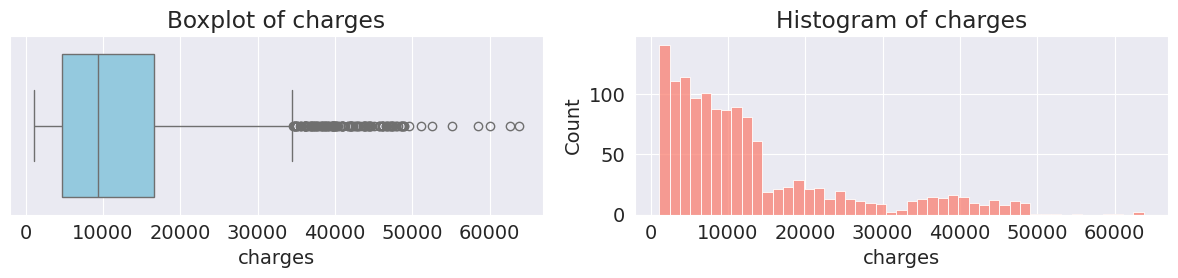

In [11]:
plt.figure(figsize=(12, 3))

# Subplot 1 – Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='charges', color='skyblue')
plt.title('Boxplot of charges')

# Subplot 2 – Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='charges', bins=47, color='salmon')
plt.title('Histogram of charges')

plt.tight_layout()
plt.show()

In [12]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Có thể thấy rõ sự khác biệt về phân bổ **medical charges**: 

- Chủ yếu, với tất cả các khách hàng, chi phí thường niên rơi vào khoảng dưới $12k. Dường như với các khách hàng có bill y tế thường niên > $12k sẽ là những người có vấn đề sức khỏe khá nghiêm trọng

- Với tệp khách hàng không hút thuốc (`smoker = no`), median là $7.3k

- Với tệp khách hàng có hút thuốc (`smoker = yes`), median là $34.5k - gấp gần 5 lần so với nhóm không hút thuốc

### Smoker

<Axes: xlabel='smoker', ylabel='count'>

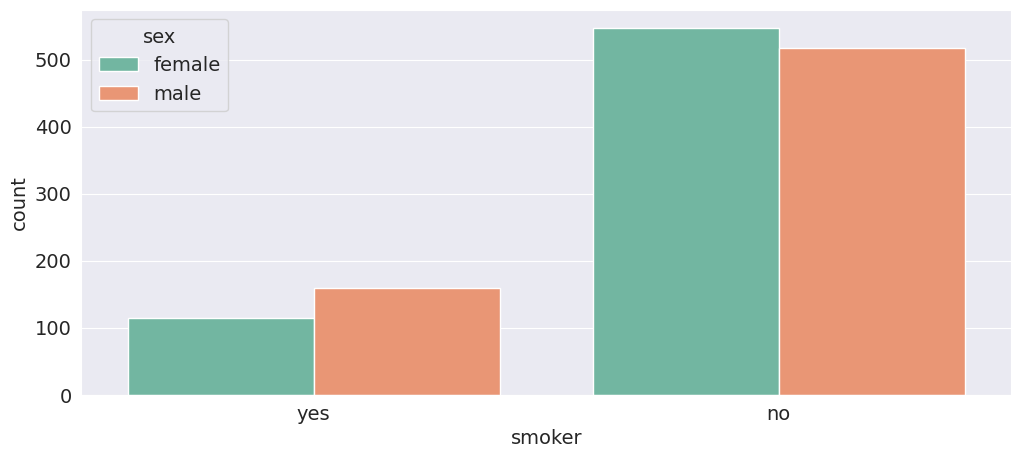

In [13]:
plt.figure(figsize=(12,5))

sns.countplot(data=df, x='smoker', palette='Set2', hue = 'sex')

In [14]:
px.histogram(df, x='smoker', color='sex', title='Smoker')

Biểu đồ cho thấy, với 1338 khách hàng được ghi nhận trong bảng, có **khoảng 20%** trong số họ là có hút thuốc. 

Số liệu này khá sát với khảo sát của [MacroTrends](https://www.macrotrends.net/global-metrics/countries/wld/world/smoking-rate-statistics) đưa ra vào năm 2022 - trong đó, ghi nhận tỉ lệ người hút thuốc là **21.74%**

### Age & Charges

<Axes: xlabel='age', ylabel='charges'>

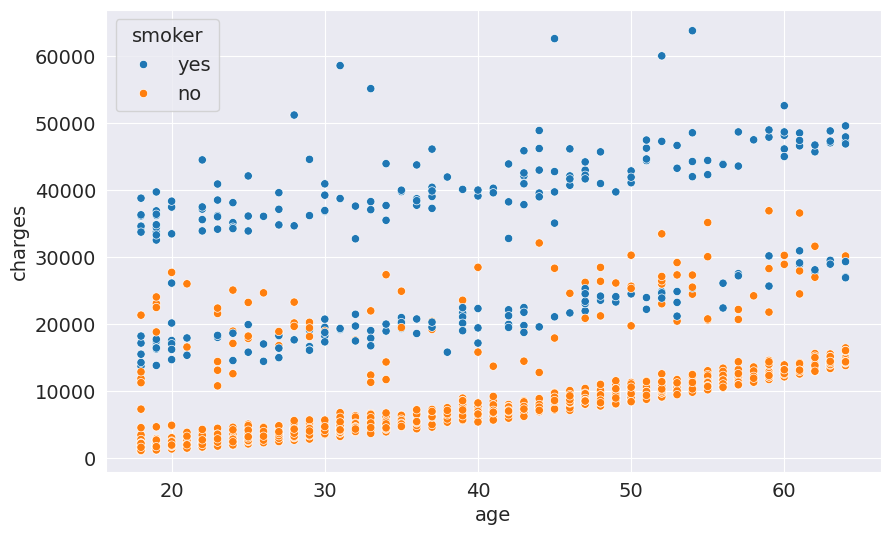

In [15]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')

In [16]:
fig = px.scatter(df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Có thể thấy, biểu đồ được plot ra có thể tạo ra 3 đường linear tương ứng với 3 nhóm đối tượng và có slope đồng biến

- Nhóm 1: Nhóm không hút thuốc, medical bills thấp nhất

- Nhóm 2: Nhóm mix (có + không hút) đang bị overlap với nhau:

    + Không hút thuốc thì bị bệnh nặng nên medical bills cao

    + Có hút thuốc nhưng chưa có bệnh nặng nên medical bills chưa quá cao

- Nhóm 3: Hút thuốc và bị bệnh nặng nên medical bills rất cao. Nhóm này có khả năng bị chịu ảnh hưởng nặng từ việc hút thuốc.

### BMI vs Charges

<Axes: xlabel='bmi', ylabel='charges'>

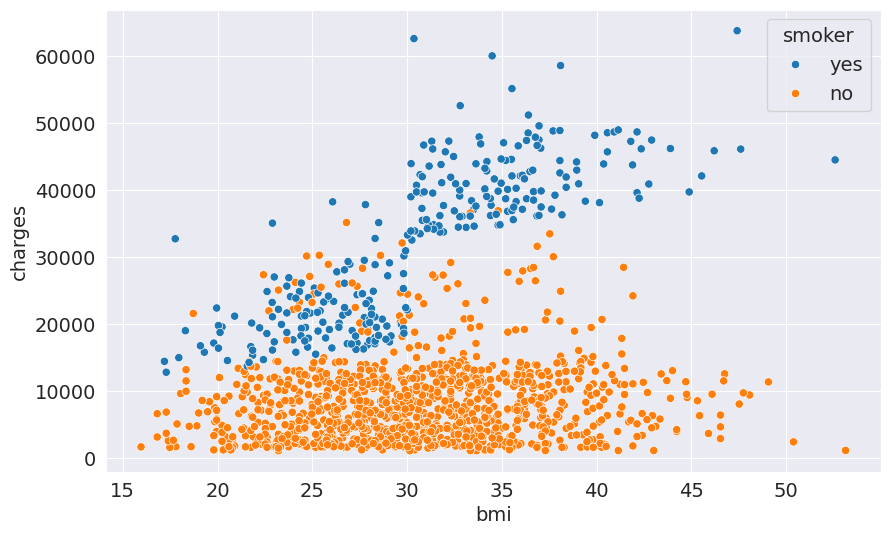

In [17]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')

In [18]:
fig = px.scatter(df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Có thể thấy, với nhóm non-smoker thì việc bmi tăng không dẫn theo sự tăng nhanh chóng của medical bills. Ngược lại, với nhóm smoker, sự tăng trưởng medical bills có xu hướng đi liền với sự tăng trưởng của bmi đối với những khách hàng có `bmi >= 30`

### Correlation

Dưới đây là công thức của tương quan 2 features X - Y:

<img src='imgs/01-corr-formula.png' width=600>

Phân loại tương quan: 

<img src='imgs/01-corr-r.png' width=600>

- Độ mạnh: Giá trị tuyệt đối của hệ số tương quan càng lớn thì mối quan hệ càng mạnh.

    + Các giá trị cực trị -1 và 1 biểu thị một mối quan hệ tuyến tính hoàn hảo, trong đó sự thay đổi của một biến đi kèm với sự thay đổi hoàn toàn nhất quán của biến còn lại. Đối với những mối quan hệ này, tất cả các điểm dữ liệu đều nằm trên một đường thẳng. Trên thực tế, sẽ không thấy bất kỳ loại mối quan hệ hoàn hảo nào.

    + Hệ số bằng 0 biểu thị không có mối quan hệ tuyến tính. Khi một biến tăng, biến kia không có xu hướng tăng hoặc giảm.

    + Khi giá trị nằm giữa 0 và +1/-1, có một mối quan hệ, nhưng các điểm không phải tất cả đều nằm trên một đường thẳng. Khi r tiến tới -1 hoặc 1, độ mạnh của mối quan hệ tăng lên và các điểm dữ liệu có xu hướng gần hơn với một đường thẳng.

- Hướng: Dấu của hệ số tương quan biểu thị hướng của mối quan hệ.

    + Các hệ số dương biểu thị rằng khi giá trị của một biến tăng, giá trị của biến kia cũng có xu hướng tăng. Các mối quan hệ dương tạo ra một độ dốc hướng lên trên biểu đồ phân tán.

    + Hệ số âm biểu thị trường hợp giá trị của một biến tăng, giá trị của biến kia có xu hướng giảm. Mối quan hệ âm tạo ra độ dốc đi xuống.

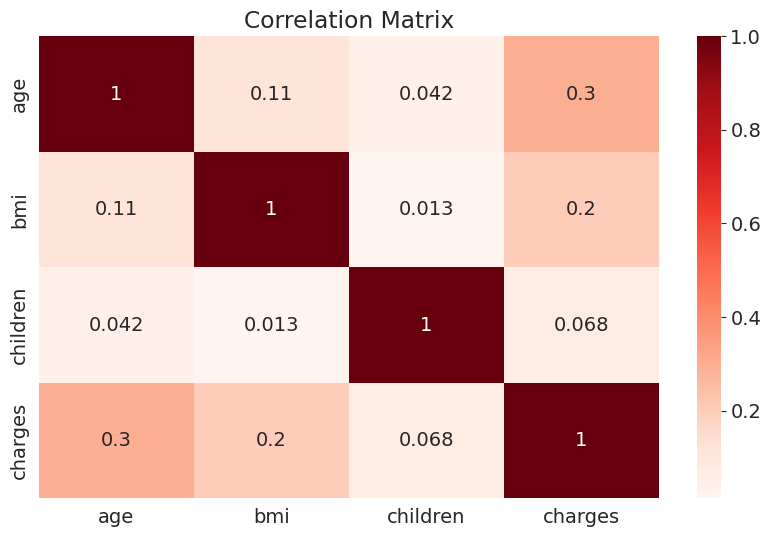

In [19]:
sns.heatmap(df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

**Ngụy biện về tương quan so với quan hệ nhân quả:** Lưu ý rằng không thể sử dụng hệ số tương quan cao để diễn giải mối quan hệ nhân quả giữa các đặc điểm. Hai đặc điểm $X$ và $Y$ có thể tương quan nếu $X$ gây ra $Y$ hoặc nếu $Y$ gây ra $X$, hoặc nếu cả hai đều được gây ra độc lập bởi một yếu tố $Z$ khác, và hệ số tương quan sẽ không còn đúng nếu một trong hai mối quan hệ nhân quả bị phá vỡ. Cũng có thể $X$ và $Y$ dường như có tương quan vì mẫu quá nhỏ.

# Linear Regression using a single feature (Hồi quy đơn biến)

In [20]:
no_smoker = df[df['smoker'] == 'no']
smoker = df[df['smoker'] == 'yes']

Text(0.5, 1.0, 'Charges vs Age (Non-Smokers)')

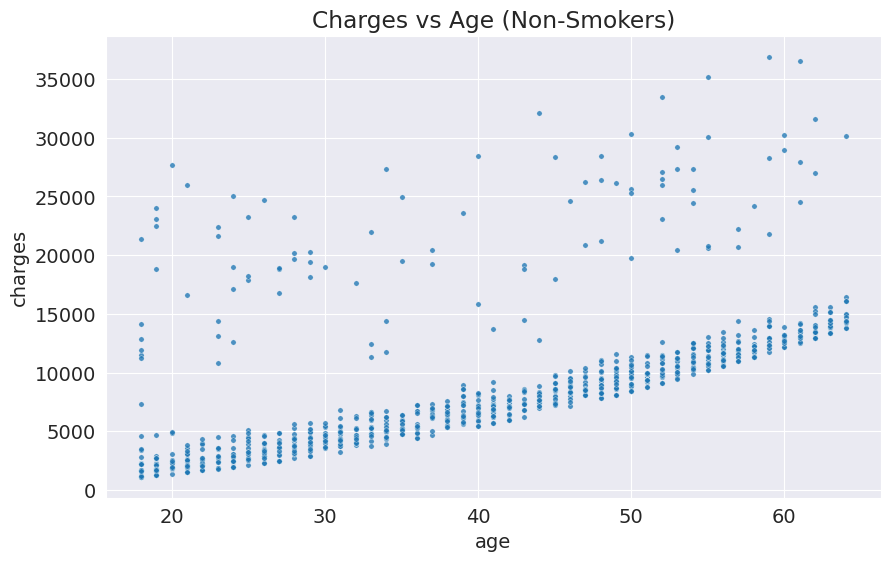

In [21]:
sns.scatterplot(data = no_smoker, x='age', y='charges', s = 15, alpha = 0.78)

plt.title('Charges vs Age (Non-Smokers)')

Ngoại trừ một vài trường hợp ngoại lệ, các điểm dường như tạo thành một đường thẳng. Chúng ta sẽ thử "khớp" một đường thẳng bằng cách sử dụng các điểm này và sử dụng đường thẳng này để dự đoán charges cho một độ tuổi nhất định. Một đường thẳng trên tọa độ X&Y có công thức sau:

$y = wx + b$

Đường thẳng này được đặc trưng bởi hai số: $w$ (gọi là "độ dốc (slope)") và $b$ (gọi là "hệ số chặn (intercept)").

## Mô hình

Trong trường hợp trên, trục x hiển thị "age" và trục y hiển thị "charges". Do đó, chúng ta giả định mối quan hệ sau giữa hai đại lượng này:

$charges = w \times age + b$

Chúng ta sẽ thử xác định $w$ và $b$ cho đường thẳng phù hợp nhất với dữ liệu.

* Kỹ thuật này được gọi là _hồi quy tuyến tính_, và chúng tôi gọi phương trình trên là _mô hình hồi quy tuyến tính_, vì nó mô hình hóa mối quan hệ giữa "age" và "charges" như một đường thẳng.

* Các số $w$ và $b$ được gọi là _tham số_ hoặc _trọng số_ của mô hình.

* Các giá trị trong cột "age" của tập dữ liệu được gọi là _đầu vào_ cho mô hình và các giá trị trong cột phí được gọi là "mục tiêu".

Hãy định nghĩa một hàm helper có tên là `estimate_charges` để tính toán $charges$, cho $age$, $w$ và $b$.

### Hàm Helper

In [22]:
def estimate_charges(age, w, b):
    return w * age + b

In [23]:
w = 50
b = 100

In [24]:
ages = no_smoker.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

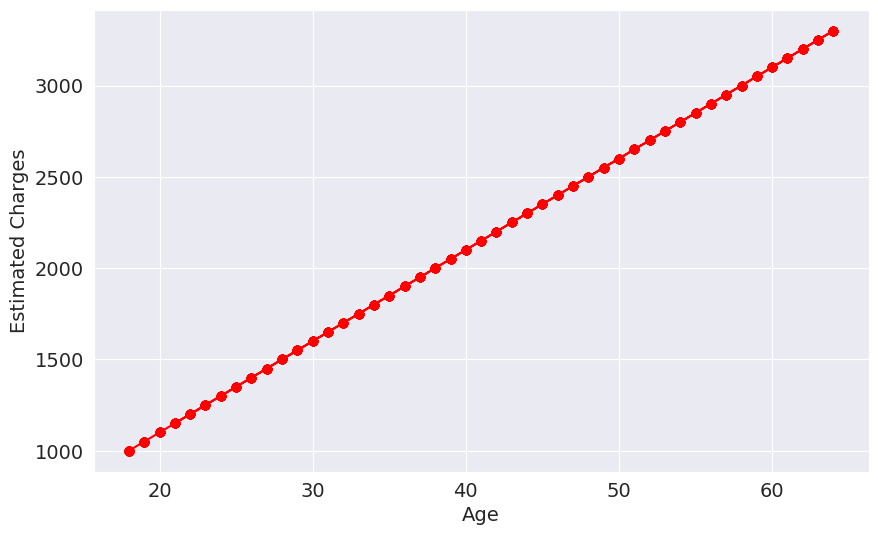

In [25]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

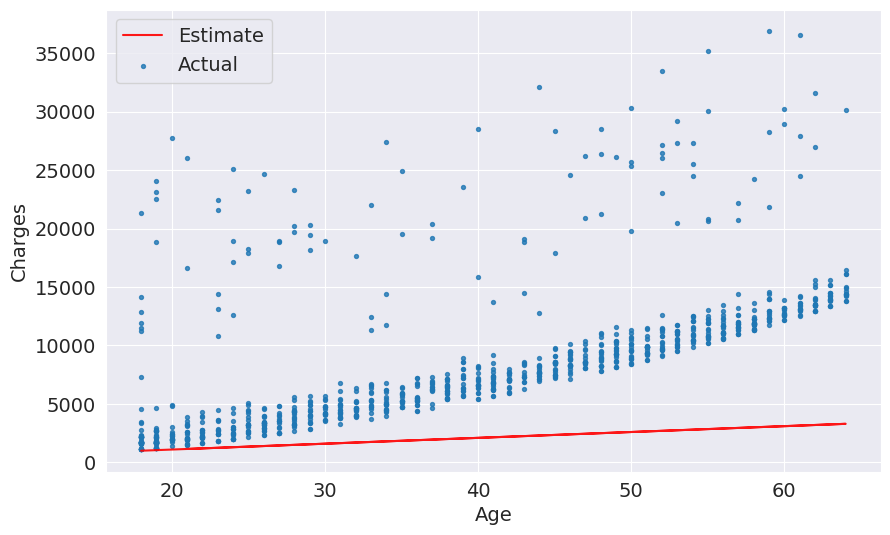

In [26]:
target = no_smoker.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

Gom các hàm trên lại để tạo thành 1 hàm mới, giúp thử param + vẽ biểu đồ

In [27]:
def try_parameters(w, b):
    ages = no_smoker.age
    target = no_smoker.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

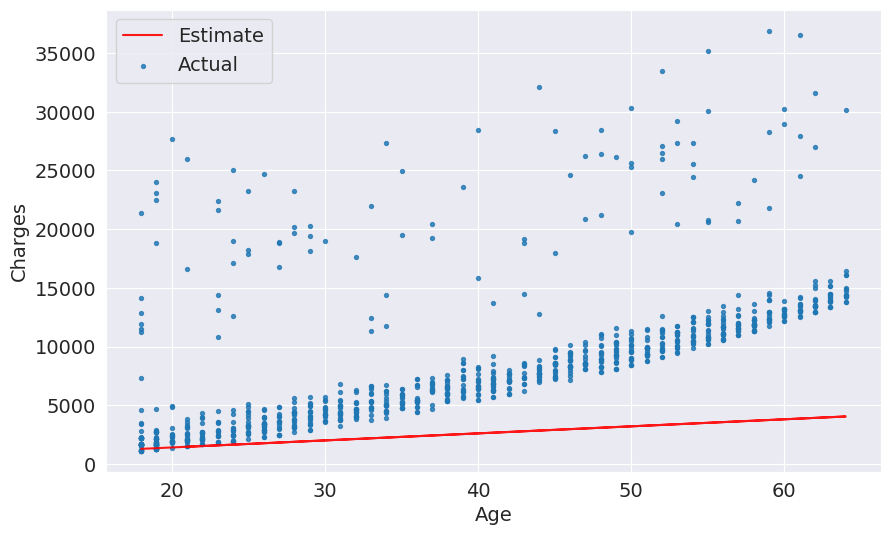

In [28]:
try_parameters(60, 200)

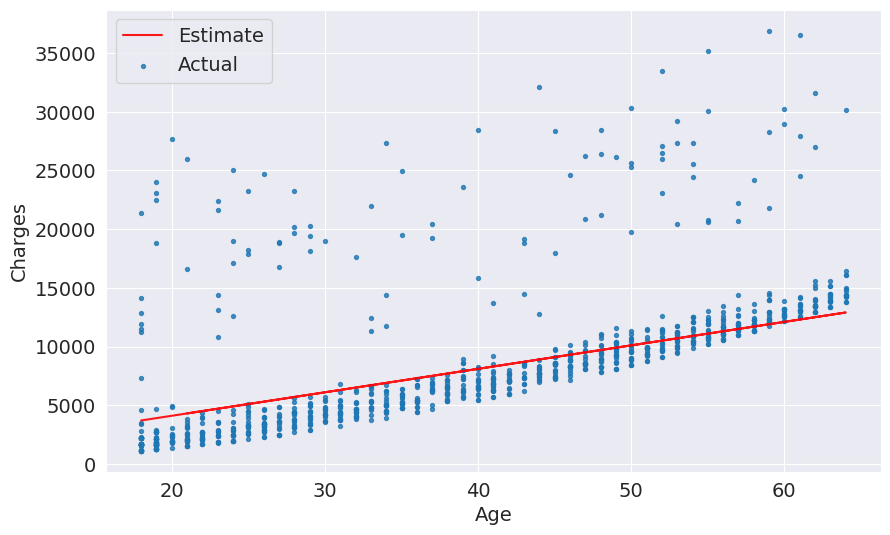

In [29]:
try_parameters(200, 100)

Khi chúng ta thay đổi thủ công các giá trị của $w$ và $b$, cố gắng di chuyển đường thẳng đến gần các điểm hơn, chúng ta đang _học_ được mối quan hệ gần đúng giữa "age" và "charges".

Sẽ thật tuyệt nếu máy tính có thể thử một số giá trị khác nhau của `w` và `b` và _học_ được mối quan hệ giữa "age" và "charges" phải không? Để làm được điều này, chúng ta cần giải quyết một vài vấn đề:

1. Chúng ta cần một cách để đo lường bằng số mức độ phù hợp của đường thẳng với các điểm.

2. Sau khi "độ phù hợp" đã được tính toán, chúng ta cần một cách để sửa đổi `w` và `b` để cải thiện độ phù hợp.

Nếu chúng ta có thể giải quyết các vấn đề trên, máy tính sẽ có thể xác định `w` và `b` cho đường thẳng phù hợp nhất, bắt đầu từ một dự đoán ngẫu nhiên.

### Hàm Tổn thất/Chi phí

Chúng ta có thể so sánh dự đoán của mô hình với mục tiêu thực tế bằng phương pháp sau:

* Tính toán chênh lệch giữa mục tiêu và dự đoán (phần chênh lệch được gọi là "phần dư")
* Bình phương tất cả các phần tử của ma trận sai phân để loại bỏ các giá trị âm.
* Tính giá trị trung bình của các phần tử trong ma trận kết quả.
* Lấy căn bậc hai của kết quả

Kết quả là một số duy nhất, được gọi là **sai số trung bình bình phương** (RMSE). Mô tả trên có thể được diễn đạt bằng toán học như sau:

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Về mặt hình học, phần dư có thể được biểu diễn như sau:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Hãy định nghĩa một hàm để tính RMSE.

In [30]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

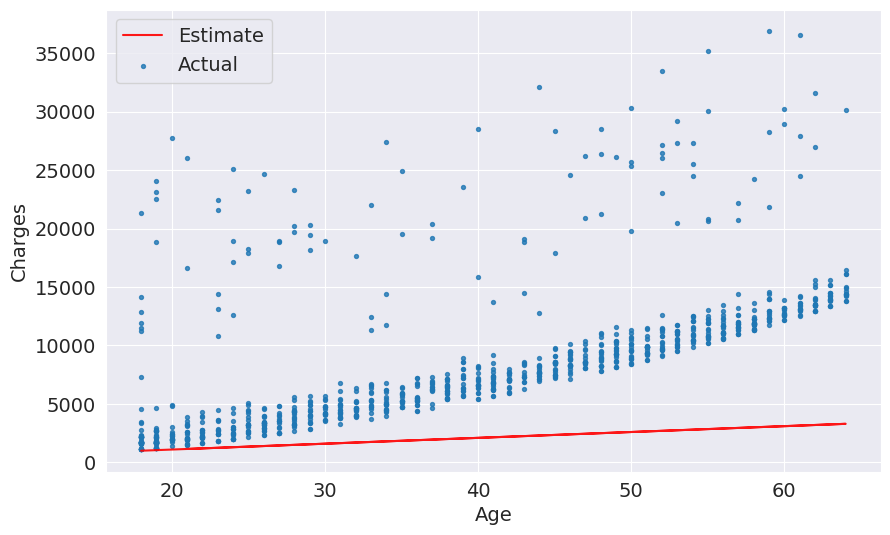

In [31]:
w = 50 
b = 100

try_parameters(w, b)

In [32]:
targets = no_smoker['charges']
predicted = estimate_charges(no_smoker.age, w, b)
rmse(targets, predicted)

8461.949562575493

Sau đây là cách chúng ta có thể diễn giải con số trên: *Trung bình, mỗi phần tử trong dự đoán chênh lệch so với mục tiêu thực tế là \$8461*.

Kết quả được gọi là *loss* vì nó cho biết mức độ kém của mô hình trong việc dự đoán các biến mục tiêu. Nó thể hiện mức độ mất thông tin trong mô hình: mức độ mất càng thấp, mô hình càng tốt.

Hãy sửa đổi các hàm `try_parameters` để hiển thị cả mức độ mất thông tin.

In [33]:
def try_parameters(w, b):
    ages = no_smoker.age
    target = no_smoker.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


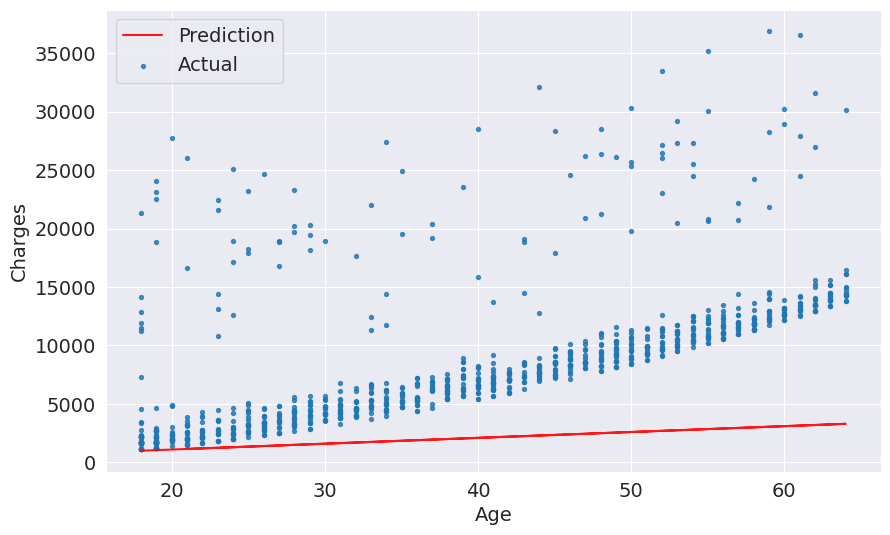

In [34]:
try_parameters(50, 100)

### Optimizer

Tiếp theo, chúng ta cần một chiến lược để điều chỉnh trọng số `w` và `b` nhằm giảm thiểu độ lệch chuẩn và cải thiện độ "phù hợp" của đường thẳng với dữ liệu.

* Phương pháp bình phương tối thiểu thông thường (OLS): https://www.youtube.com/watch?v=szXbuO3bVRk (phù hợp hơn với các tập dữ liệu nhỏ hơn)
* Phương pháp giảm dần gradient ngẫu nhiên (Stochastic gradient descent - SGD): https://www.youtube.com/watch?v=sDv4f4s2SB8 (phù hợp hơn với các tập dữ liệu lớn hơn)

Cả hai phương pháp này đều có cùng mục tiêu: giảm thiểu độ lệch chuẩn, tuy nhiên, trong khi phương pháp bình phương tối thiểu thông thường trực tiếp tính toán các giá trị tốt nhất cho `w` và `b` bằng các phép toán ma trận, thì phương pháp giảm dần gradient lại sử dụng phương pháp lặp, bắt đầu với các giá trị ngẫu nhiên của `w` và `b` và dần dần cải thiện chúng bằng cách sử dụng đạo hàm.

Dưới đây là hình ảnh minh họa cách thức hoạt động của phương pháp giảm dần độ dốc:

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)

Nó trông có vẻ giống với chiến lược của chúng ta là dần dần di chuyển đường thẳng đến gần các điểm hơn phải không?

### Linear Regression sử dụng Scikit-learn

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

In [37]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [38]:
inputs = no_smoker[['age']]
targets = no_smoker.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [39]:
model.fit(inputs, targets)

LinearRegression()

In [40]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [41]:
rmse(targets, predictions)

4662.505766636395

In [42]:
# w
model.coef_

array([267.24891283])

In [43]:
# b
model.intercept_

-2091.4205565650864

RMSE Loss:  4662.505766636395


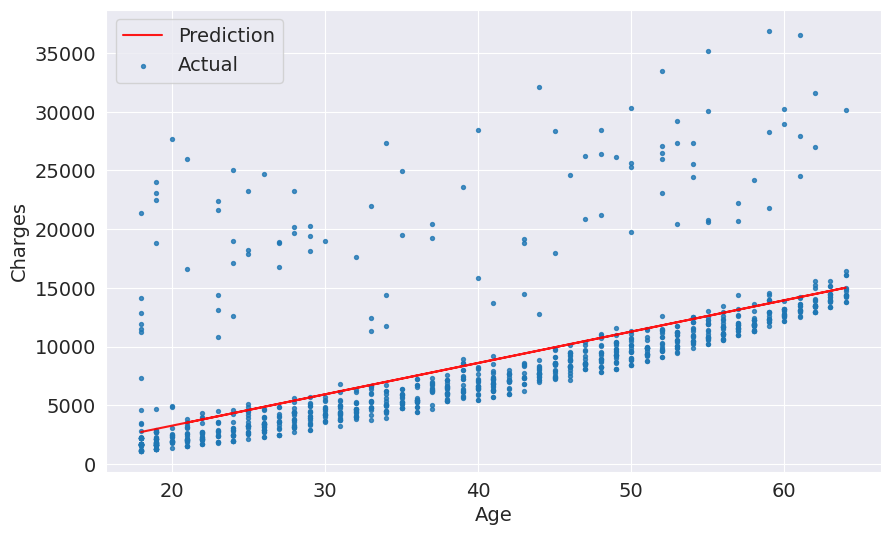

In [44]:
try_parameters(model.coef_, model.intercept_)

### Học máy - Machine Learning

Chúng ta vừa huấn luyện xong _mô hình học máy đầu tiên!_ Học máy đơn giản là quá trình tính toán các tham số tốt nhất để mô hình hóa mối quan hệ giữa một số features và targets.

Mỗi bài toán học máy đều có ba thành phần:

1. **Mô hình**

2. **Hàm chi phí**

3. **Bộ tối ưu hóa**

Chúng ta sẽ xem xét một số ví dụ về từng thành phần trên trong các hướng dẫn sau. Dưới đây là cách hình dung mối quan hệ giữa ba thành phần này:

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

In [45]:
# Create inputs and targets
inputs, targets = no_smoker[['age']], no_smoker['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


## Linear Regression using Multiple Features (Hồi quy tuyến tính đa biến)

In [46]:
# Create inputs and targets
inputs, targets = no_smoker[['age', 'bmi']], no_smoker['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


Việc thêm `bmi` vào dường như không ảnh hưởng quá tới Loss, điều này có thể giải thích do correlation giữa `bmi` và `charges` rất yếu

In [47]:
no_smoker.charges.corr(no_smoker.bmi)

0.0840365431283327

In [48]:
fig = px.scatter_3d(no_smoker, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [49]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

Rõ ràng, BMI có trọng số thấp hơn nhiều, và bạn có thể hiểu tại sao. Nó chỉ đóng góp một phần rất nhỏ, và thậm chí điều đó có thể là do ngẫu nhiên. 

Đây là một điều quan trọng cần ghi nhớ: bạn không thể tìm thấy một mối quan hệ nào không tồn tại, bất kể bạn áp dụng kỹ thuật học máy hay thuật toán tối ưu hóa nào.

Hãy tiến thêm một bước nữa và thêm cột số cuối cùng: "trẻ em", dường như có mối tương quan với "điện tích".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + b$

In [50]:
no_smoker.charges.corr(no_smoker.children)

0.13892870453542183

In [51]:
# Create inputs and targets
inputs, targets = no_smoker[['age', 'bmi', 'children']], no_smoker['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038246


In [52]:
# Create inputs and targets
inputs, targets = df[['age', 'bmi', 'children']], df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


## Sử dụng biến Categorical cho Machine Learning

Cho đến nay, chúng ta chỉ sử dụng các cột số, vì chúng ta chỉ có thể thực hiện các phép tính với số. Nếu chúng ta có thể sử dụng các cột phân loại như "smoker", chúng ta có thể huấn luyện một mô hình duy nhất cho toàn bộ tập dữ liệu.

Để sử dụng các cột phân loại, chúng ta chỉ cần chuyển đổi chúng thành số. Có ba kỹ thuật phổ biến để thực hiện việc này:

1. Nếu một cột phân loại chỉ có hai loại (được gọi là loại nhị phân), thì chúng ta có thể thay thế các giá trị của chúng bằng 0 và 1.
2. Nếu một cột phân loại có nhiều hơn 2 loại, chúng ta có thể thực hiện mã hóa one-hot, tức là tạo một cột mới cho mỗi loại với các giá trị 1 và 0.
3. Nếu các loại có thứ tự tự nhiên (ví dụ: lạnh, trung tính, ấm, nóng), thì chúng có thể được chuyển đổi thành số (ví dụ: 1, 2, 3, 4) mà vẫn giữ nguyên thứ tự. Chúng được gọi là số thứ tự

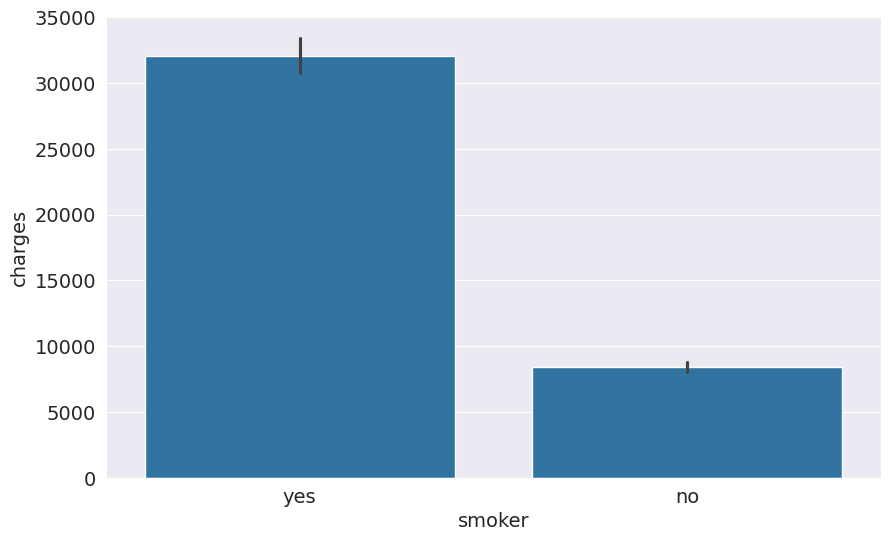

In [53]:
sns.barplot(data=df, x='smoker', y='charges');

In [54]:
smoker_codes = {'no': 0, 'yes': 1}
df['smoker_code'] = df.smoker.map(smoker_codes)

In [55]:
df.charges.corr(df.smoker_code)

0.7872514304984782

Bây giờ chúng ta có thể sử dụng cột `df` cho hồi quy tuyến tính.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + b$

In [56]:
# Create inputs and targets
inputs, targets = df[['age', 'bmi', 'children', 'smoker_code']], df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


Loss giảm từ `11355` xuống `6056`, gần 50%. Vì vậy không bao giờ được bỏ qua biến Categorical

Chúng ta hãy thử thêm cột "sex" nữa.

$charges = w_1 \times age + w_2 \times BMI + w_3 \times charges + w_4 \times smoker + w_5 \times sex + b$

<Axes: xlabel='sex', ylabel='charges'>

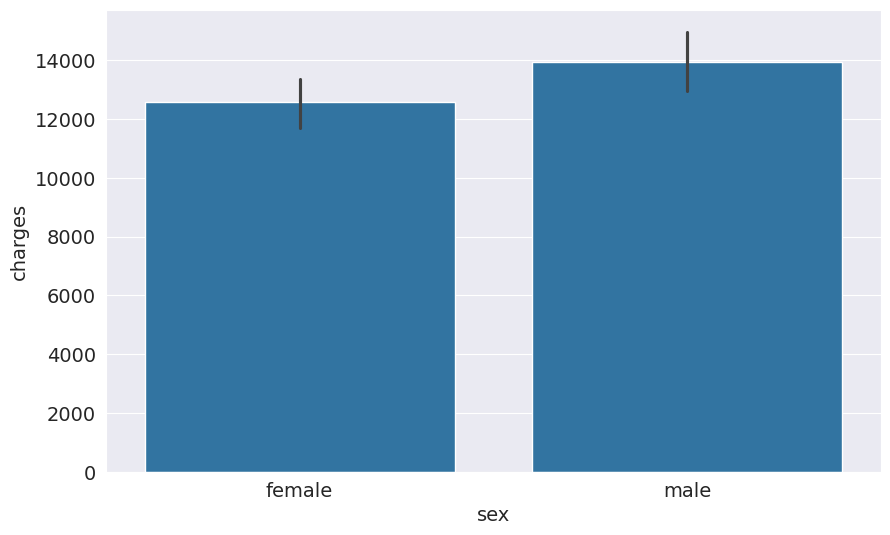

In [57]:
sns.barplot(data=df, x='sex', y='charges')

In [58]:
sex_codes = {'female': 0, 'male': 1}
df['sex_code'] = df.sex.map(sex_codes)
df.charges.corr(df.sex_code)

0.05729206220202531

In [59]:
# Create inputs and targets
inputs, targets = df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


### One-hot Encoder

Cột "vùng" chứa 4 giá trị, vì vậy chúng ta cần sử dụng mã hóa hot và tạo một cột mới cho mỗi vùng.

![](https://i.imgur.com/n8GuiOO.png)

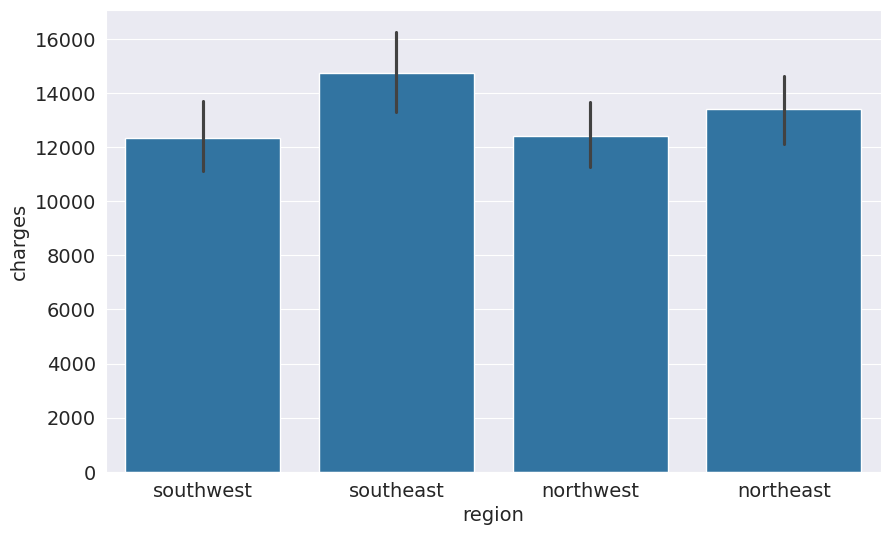

In [60]:
sns.barplot(data=df, x='region', y='charges');

In [61]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [62]:
one_hot = enc.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [63]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [64]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
5,31,female,25.740,0,no,southeast,3756.62160,0,0,0.0,0.0,1.0,0.0
6,46,female,33.440,1,no,southeast,8240.58960,0,0,0.0,0.0,1.0,0.0
7,37,female,27.740,3,no,northwest,7281.50560,0,0,0.0,1.0,0.0,0.0
8,37,male,29.830,2,no,northeast,6406.41070,0,1,1.0,0.0,0.0,0.0
9,60,female,25.840,0,no,northwest,28923.13692,0,0,0.0,1.0,0.0,0.0


In [65]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = df[input_cols], df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


## Model Improvements

Hãy cùng thảo luận và áp dụng thêm một số cải tiến cho mô hình của chúng ta.

### Feature Scaling

Nhớ lại rằng do các yêu cầu về quy định, chúng ta cũng cần giải thích cơ sở lý luận đằng sau các dự đoán của mô hình.

$charges = w_1 \times age + w_2 \times BMI + w_3 \times charges + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

Để so sánh tầm quan trọng của từng tính năng trong mô hình, phản xạ đầu tiên của chúng ta có thể là so sánh trọng số của chúng.

In [66]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [67]:
model.intercept_

-12525.547811195447

In [68]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


Mặc dù có vẻ như BMI và "northeast" có trọng số cao hơn độ tuổi, nhưng cần lưu ý rằng phạm vi giá trị của BMI bị giới hạn (từ 15 đến 40) và cột "northeast" chỉ nhận các giá trị 0 và 1.

Vì các cột khác nhau có phạm vi khác nhau, chúng ta gặp phải hai vấn đề:

1. Chúng ta không thể so sánh trọng số của các cột khác nhau để xác định đặc điểm nào là quan trọng.

2. Một cột có phạm vi đầu vào lớn hơn có thể ảnh hưởng không cân xứng đến độ mất mát và chi phối quá trình tối ưu hóa.

Vì lý do này, thông lệ phổ biến là chia tỷ lệ (hoặc chuẩn hóa) các giá trị trong cột số bằng cách trừ giá trị trung bình và chia cho độ lệch chuẩn.

![](https://i.imgur.com/dT5fLFI.png)

Chúng ta có thể áp dụng tỷ lệ bằng cách sử dụng lớp StandardScaler từ `scikit-learn`.

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [71]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [72]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [73]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [74]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = df[cat_cols].values

In [75]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


Bây giờ chúng ta có thể so sánh các trọng số trong công thức:

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [76]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


### Creating a Test Set

Các mô hình như mô hình đã tạo trong hướng dẫn này được thiết kế để sử dụng trong thực tế. Thông thường, người ta sẽ dành riêng một phần nhỏ dữ liệu (ví dụ: 10%) chỉ để thử nghiệm và báo cáo kết quả của mô hình.

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [79]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5274.423063637832


In [80]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6123.091799124561


### Cách tiếp cận một bài toán học máy

Dưới đây là một chiến lược bạn có thể áp dụng để tiếp cận bất kỳ bài toán học máy nào:

1. Khám phá dữ liệu và tìm mối tương quan giữa đầu vào và mục tiêu
2. Chọn mô hình, hàm mất mát và bộ tối ưu hóa phù hợp cho bài toán đang xét
3. Chia tỷ lệ các biến số và mã hóa dữ liệu danh mục one-hot
4. Dành riêng một tập kiểm tra (sử dụng một phần của tập huấn luyện)
5. Huấn luyện mô hình
6. Đưa ra dự đoán trên tập kiểm tra và tính toán mất mát

## Tóm tắt và Tài liệu đọc thêm

Chúng tôi đã đề cập đến các chủ đề sau trong hướng dẫn này:

- Một phát biểu bài toán điển hình cho học máy
- Tải xuống và khám phá tập dữ liệu cho học máy
- Hồi quy tuyến tính với một biến sử dụng Scikit-learn
- Hồi quy tuyến tính với nhiều biến
- Sử dụng các đặc trưng phân loại cho học máy
- Hệ số hồi quy và tầm quan trọng của các đặc trưng
- Tạo tập huấn luyện và tập kiểm tra để báo cáo kết quả

Áp dụng các kỹ thuật được đề cập trong hướng dẫn này cho các tập dữ liệu sau:

- https://www.kaggle.com/vikrishnan/boston-house-prices
- https://www.kaggle.com/sohier/calcofi
- https://www.kaggle.com/budincsevity/szeged-weather

Xem các liên kết sau để tìm hiểu thêm về hồi quy tuyến tính:

- https://jovian.ai/aakashns/02-linear-regression
- https://www.kaggle.com/hely333/eda-regression
- https://www.youtube.com/watch?v=kHwlB_j7Hkc